# Sales Forecasting

To create a data science pipeline for predicting future sales based on the provided data, we will follow these steps:

Load Data: Read the CSV file into a DataFrame.

Prepare Data: Clean the data, handle missing values, and perform necessary transformations.

Exploratory Data Analysis (EDA): Visualize and summarize the data to understand its characteristics.

Train Model: Train a time series forecasting model.

Forecast: Use the trained model to predict future sales.

Let's start by examining the data file.

In [490]:

# EDA Libraries:

import pandas as pd
import numpy as np

import matplotlib.colors as col
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime
from pathlib import Path  
import random

# Scikit-Learn models:

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split

from prophet import Prophet

# ARIMA Model:

import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse


import pickle
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

In [491]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [492]:
import os

# List files in the directory
files = os.listdir('Documents/Machine Learning')
print(files)


['.DS_Store', 'Time Series.ipynb', 'Data Sets', 'Portfolio Construction and Analysis-edhec business school coursera', 'Time Series', 'Data Collection- Web scrapping', 'sensor.csv', 'Time Series Exploratory Data Analysis- Tesla Stock.ipynb', '.ipynb_checkpoints', 'Deep Learning', 'sales_data_practical_assignment.csv', 'Cleaning Time series data- Beer Production in Australia.ipynb']


In [493]:
# Read the file content
file_path = 'Documents/Machine Learning/sales_data_practical_assignment.csv'

with open(file_path, 'r') as file:
    content = file.readlines()

# Display the first few lines
print(content[:10])

[',orderDate,WGR1,WGR2,WGR3,WGR4,articleNumber,quantity,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,promotion_article,promotion_wgr,promotion_global,public_holiday,school_holiday,sunday\n', "0,2021-03-01,0.0,42,4200,4210,1010,0.0,4.2,0.2,'75.1',0.0,0.0,333.9,8.1,30.2,1035.0,590.0,2,no,no,no,no,no,no\n", "1,2021-03-01,0.0,85,8700,8708,0546,86.106186954104,4.2,0.2,'75.1',0.0,0.0,333.9,8.1,30.2,1035.0,590.0,2,no,no,no,no,no,no\n", "2,2021-03-01,0.0,85,8700,8702,90412196,54.690260418206066,4.2,0.2,'75.1',0.0,0.0,333.9,8.1,30.2,1035.0,590.0,2,no,no,no,no,no,no\n", "3,2021-03-01,0.0,85,8700,8702,90412080,64.11503837897544,4.2,0.2,'75.1',0.0,0.0,333.9,8.1,30.2,1035.0,590.0,2,no,no,no,no,no,no\n", "4,2021-03-01,0.0,85,8700,8702,90412011,26.41592653589793,4.2,0.2,'75.1',0.0,0.0,333.9,8.1,30.2,1035.0,590.0,2,no,no,no,no,no,no\n", "5,2021-03-01,0.0,85,8660,8665,5001,0.0,4.2,0.2,'75.1',0.0,0.0,333.9,8.1,30.2,1035.0,590.0,2,no,no,no,no,no,no\n", "6,2021-03-01,0.0,68,6800,6802,65110,38.98

#### Step 1: Load Data
We'll load the data from the CSV file.

In [494]:
 # Load the data

data = pd.read_csv(file_path)

# Display #the first few rows of the dataframe
data.head()

,Unnamed: 0,orderDate,WGR1,WGR2,WGR3,WGR4,articleNumber,quantity,temp,dwpt,...,wpgt,pres,tsun,coco,promotion_article,promotion_wgr,promotion_global,public_holiday,school_holiday,sunday
0,0,2021-03-01,0.0,42,4200,4210,1010,0.000000,4.2,0.2,...,30.2,1035.0,590.0,2,no,no,no,no,no,no
1,1,2021-03-01,0.0,85,8700,8708,546,86.106187,4.2,0.2,...,30.2,1035.0,590.0,2,no,no,no,no,no,no
2,2,2021-03-01,0.0,85,8700,8702,90412196,54.690260,4.2,0.2,...,30.2,1035.0,590.0,2,no,no,no,no,no,no
3,3,2021-03-01,0.0,85,8700,8702,90412080,64.115038,4.2,0.2,...,30.2,1035.0,590.0,2,no,no,no,no,no,no
4,4,2021-03-01,0.0,85,8700,8702,90412011,26.415927,4.2,0.2,...,30.2,1035.0,590.0,2,no,no,no,no,no,no


#### Step 2: Prepare Data
    
This step includes handling missing values, parsing dates, and ensuring the data is in the correct format for analysis.

In [495]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9432 entries, 0 to 9431
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9432 non-null   int64  
 1   orderDate          9432 non-null   object 
 2   WGR1               9432 non-null   float64
 3   WGR2               9432 non-null   int64  
 4   WGR3               9432 non-null   int64  
 5   WGR4               9432 non-null   int64  
 6   articleNumber      9432 non-null   int64  
 7   quantity           9432 non-null   float64
 8   temp               9422 non-null   float64
 9   dwpt               9432 non-null   float64
 10  rhum               9432 non-null   object 
 11  prcp               9432 non-null   float64
 12  snow               9432 non-null   float64
 13  wdir               9432 non-null   float64
 14  wspd               9432 non-null   float64
 15  wpgt               9432 non-null   float64
 16  pres               9432 

In [496]:
data.dtypes

Unnamed: 0             int64
orderDate             object
WGR1                 float64
WGR2                   int64
WGR3                   int64
WGR4                   int64
articleNumber          int64
quantity             float64
temp                 float64
dwpt                 float64
rhum                  object
prcp                 float64
snow                 float64
wdir                 float64
wspd                 float64
wpgt                 float64
pres                 float64
tsun                 float64
coco                   int64
promotion_article     object
promotion_wgr         object
promotion_global      object
public_holiday        object
school_holiday        object
sunday                object
dtype: object

In [497]:
#statistical analysis of the dataset:Mean, Standard Deviation
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,9432.0,4.715500e+03,2.722928e+03,0.0,2357.75,4715.500000,7073.250000,9.431000e+03
WGR1,9432.0,0.000000e+00,0.000000e+00,0.0,0.00,0.000000,0.000000,0.000000e+00
WGR2,9432.0,5.454167e+01,1.715215e+01,42.0,42.00,45.000000,68.000000,8.500000e+01
WGR3,9432.0,5.519167e+03,1.774763e+03,4200.0,4275.00,4500.000000,6800.000000,8.700000e+03
WGR4,9432.0,5.524958e+03,1.773168e+03,4210.0,4281.00,4504.000000,6802.000000,8.708000e+03
articleNumber,9432.0,1.145394e+07,2.984512e+07,527.0,152345.50,243003.000000,247655.000000,9.041220e+07
quantity,9432.0,9.213614e+01,2.757516e+02,0.0,0.00,29.557519,64.115038,3.758628e+03
temp,9422.0,1.150754e+01,7.534373e+00,-2.8,5.50,10.200000,17.700000,2.740000e+01
dwpt,9432.0,4.744529e+00,7.001685e+00,-13.3,-0.80,4.000000,10.600000,1.870000e+01
prcp,9432.0,1.404835e+00,5.745461e+00,0.0,0.00,0.000000,0.500000,9.670000e+01


### Data Preprocessing

#### Columns to Drop



The Weather-related columns (temp, dwpt, rhum, prcp, snow, wdir, wspd, wpgt, pres, tsun, coco) are dropped to simplify the ananlysis,because there is no  specific reason to consider weather impact on sales.

Sunday is a holiday, hence omitted.

In [498]:
# Drop weather-related columns 
columns_to_drop = ['temp','dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun', 'coco','snow','Unnamed: 0']
data.drop(columns=columns_to_drop, inplace=True)

In [499]:
data.head(5)

,orderDate,WGR1,WGR2,WGR3,WGR4,articleNumber,quantity,promotion_article,promotion_wgr,promotion_global,public_holiday,school_holiday,sunday
0,2021-03-01,0.0,42,4200,4210,1010,0.000000,no,no,no,no,no,no
1,2021-03-01,0.0,85,8700,8708,546,86.106187,no,no,no,no,no,no
2,2021-03-01,0.0,85,8700,8702,90412196,54.690260,no,no,no,no,no,no
3,2021-03-01,0.0,85,8700,8702,90412080,64.115038,no,no,no,no,no,no
4,2021-03-01,0.0,85,8700,8702,90412011,26.415927,no,no,no,no,no,no


In [500]:
#check percentage of missing values for each column
(data.isnull().sum().sort_values(ascending=False)/len(data))*100

promotion_article    0.106022
orderDate            0.000000
WGR1                 0.000000
WGR2                 0.000000
WGR3                 0.000000
WGR4                 0.000000
articleNumber        0.000000
quantity             0.000000
promotion_wgr        0.000000
promotion_global     0.000000
public_holiday       0.000000
school_holiday       0.000000
sunday               0.000000
dtype: float64

In [501]:
# Forward fill the 'promotion_article' column
data['promotion_article'] = data['promotion_article'].ffill()




In [502]:
# Verify the imputation
missing_values_promotion_article = data['promotion_article'].isnull().sum()
print(f"Number of missing values in 'promotion_article' after forward fill: {missing_values_promotion_article}")



Number of missing values in 'promotion_article' after forward fill: 0


In [503]:
#Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 orderDate            0
WGR1                 0
WGR2                 0
WGR3                 0
WGR4                 0
articleNumber        0
quantity             0
promotion_article    0
promotion_wgr        0
promotion_global     0
public_holiday       0
school_holiday       0
sunday               0
dtype: int64


In [504]:
# Check for duplicate rows
duplicate_rows = data.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 1


In [505]:
# Remove duplicate rows
data_no_duplicates = data.drop_duplicates()

In [506]:
# Verify the removal of duplicate rows
print(f"Number of rows after removing duplicates: {data_no_duplicates.shape[0]}")

Number of rows after removing duplicates: 9431


In [507]:
# Check again for duplicates to confirm they are removed
duplicate_rows_after = data_no_duplicates.duplicated()
print(f"Number of duplicate rows after removal: {duplicate_rows_after.sum()}")

Number of duplicate rows after removal: 0


#### Label Encoding 

A technique used to convert categorical data('promotion_article','promotion_wgr','promotion_global','public_holiday','school_holiday','sunday' ) into a binary matrix

In [508]:
data.columns = data.columns.to_series().apply(lambda x: x.strip())

In [509]:
#categorical data
categorical_cols = ['WGR1','WGR2','WGR3','WGR4','promotion_wgr','promotion_global','promotion_article','public_holiday','school_holiday','sunday'] 

In [510]:
# Create a LabelEncoder object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply label encoding to selected columns
for col in categorical_cols:
  data[col] = le.fit_transform(data[col])

Defines categorical_cols (optional) to specify which columns to encode. If omitted, all categorical columns will be encoded.

Creates a LabelEncoder object.
Loops through the categorical_cols and applies fit_transform on each column. This method fits the encoder on the unique categories and then transforms the column values to their corresponding integer labels.
Prints the encoded DataFrame.
Explanation:

fit_transform is used because we want the encoder to learn the unique categories from the data while simultaneously transforming the values.
The loop ensures each column has its own unique encoding scheme.
This approach allows you to encode specific columns or all categorical columns in your DataFrame for further analysis or machine learning tasks.

In [511]:
df

,orderDate,articleNumber,quantity,WGR1_0,WGR2_0,WGR2_1,WGR2_2,WGR2_3,WGR2_4,WGR2_5,...,promotion_article_0,promotion_article_1,public_holiday_0,public_holiday_1,school_holiday_0,school_holiday_1,school_holiday_2,sunday_0,sunday_1,is_valid_date
0,2021-03-01,1010,0.000000,1,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,True
1,2021-03-01,546,86.106187,1,0,0,0,0,0,1,...,1,0,1,0,0,1,0,1,0,True
2,2021-03-01,90412196,54.690260,1,0,0,0,0,0,1,...,1,0,1,0,0,1,0,1,0,True
3,2021-03-01,90412080,64.115038,1,0,0,0,0,0,1,...,1,0,1,0,0,1,0,1,0,True
4,2021-03-01,90412011,26.415927,1,0,0,0,0,0,1,...,1,0,1,0,0,1,0,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9427,2022-03-28,235900,0.000000,1,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,True
9428,2022-03-28,1010,0.000000,1,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,True
9429,2022-03-28,90412196,0.000000,1,0,0,0,0,0,1,...,1,0,1,0,0,1,0,1,0,True
9430,2022-03-28,246220,0.000000,1,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,True


In [512]:
data=df
data

,orderDate,articleNumber,quantity,WGR1_0,WGR2_0,WGR2_1,WGR2_2,WGR2_3,WGR2_4,WGR2_5,...,promotion_article_0,promotion_article_1,public_holiday_0,public_holiday_1,school_holiday_0,school_holiday_1,school_holiday_2,sunday_0,sunday_1,is_valid_date
0,2021-03-01,1010,0.000000,1,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,True
1,2021-03-01,546,86.106187,1,0,0,0,0,0,1,...,1,0,1,0,0,1,0,1,0,True
2,2021-03-01,90412196,54.690260,1,0,0,0,0,0,1,...,1,0,1,0,0,1,0,1,0,True
3,2021-03-01,90412080,64.115038,1,0,0,0,0,0,1,...,1,0,1,0,0,1,0,1,0,True
4,2021-03-01,90412011,26.415927,1,0,0,0,0,0,1,...,1,0,1,0,0,1,0,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9427,2022-03-28,235900,0.000000,1,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,True
9428,2022-03-28,1010,0.000000,1,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,True
9429,2022-03-28,90412196,0.000000,1,0,0,0,0,0,1,...,1,0,1,0,0,1,0,1,0,True
9430,2022-03-28,246220,0.000000,1,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,True


#### Handling DateTime column


Sample DataFrame: A sample DataFrame is created with orderDate and quantity columns.
    
Applying Validation Function: The is_valid_date function is applied to the orderDate column, creating a new column is_valid_date that indicates whether each date is valid.
    
Filtering Valid Dates: The DataFrame is filtered to keep only rows with valid dates.
    
Dropping Helper Column: The helper column is_valid_date is dropped, leaving only the original columns with valid dates.
    
This ensures that only valid dates are used in subsequent analysis, which can prevent errors and inconsistencies.

#### We can create a function to identify rows with malformed dates.

This function attempts to convert a string to a datetime object using the specified format ('%Y-%m-%d'). If the conversion is successful, it returns True; otherwise, it returns False.

The is_valid_date function uses pd.to_datetime to attempt to convert the date_str to a datetime object with the specified format ('%Y-%m-%d').

Try-Except Block: If the conversion is successful, True is returned. If a ValueError is raised (e.g., due to an invalid date), False is returned.

This shows how to use the is_valid_date function to check a list of date strings for validity. The validity dictionary maps each date string to its validity (True or False).

In [513]:
# Function to check for valid dates
def is_valid_date(date_str):
    try:
        pd.to_datetime(date_str, format='%Y-%m-%d')
        return True
    except ValueError:
        return False

In [514]:
# Apply the function to the 'orderDate' column
data['is_valid_date'] = data['orderDate'].apply(is_valid_date)

In [515]:
# Display rows with invalid dates
invalid_dates = data[~data['is_valid_date']]
print(invalid_dates)

       orderDate  articleNumber  quantity  WGR1_0  WGR2_0  WGR2_1  WGR2_2  \
1002  2021-40-11         244235       0.0       1       1       0       0   

      WGR2_3  WGR2_4  WGR2_5  ...  promotion_article_0  promotion_article_1  \
1002       0       0       0  ...                    0                    1   

      public_holiday_0  public_holiday_1  school_holiday_0  school_holiday_1  \
1002                 1                 0                 0                 1   

      school_holiday_2  sunday_0  sunday_1  is_valid_date  
1002                 0         0         1          False  

[1 rows x 41 columns]


In [516]:
# Display the number of invalid dates
print(f"Number of invalid dates: {len(invalid_dates)}")


Number of invalid dates: 1


Based on the output, we can decide to either correct or drop rows with invalid dates.

In [517]:
# Drop rows with invalid dates
data = data[data['is_valid_date']]

In [518]:
# Drop the 'is_valid_date' helper column
data.drop(columns=['is_valid_date'], inplace=True)


In [519]:
# Parse dates and set the index
data['orderDate'] = pd.to_datetime(data['orderDate'], format='%Y-%m-%d')
data.set_index('orderDate', inplace=True)


In [520]:
# Display the first few rows of the cleaned dataframe
print(data.head(5))

            articleNumber   quantity  WGR1_0  WGR2_0  WGR2_1  WGR2_2  WGR2_3  \
orderDate                                                                      
2021-03-01           1010   0.000000       1       1       0       0       0   
2021-03-01            546  86.106187       1       0       0       0       0   
2021-03-01       90412196  54.690260       1       0       0       0       0   
2021-03-01       90412080  64.115038       1       0       0       0       0   
2021-03-01       90412011  26.415927       1       0       0       0       0   

            WGR2_4  WGR2_5  WGR3_0  ...  promotion_global_0  \
orderDate                           ...                       
2021-03-01       0       0       1  ...                   1   
2021-03-01       0       1       0  ...                   1   
2021-03-01       0       1       0  ...                   1   
2021-03-01       0       1       0  ...                   1   
2021-03-01       0       1       0  ...                   1  

In [521]:
# Display the last few rows of the cleaned dataframe
print(data.tail(5))

            articleNumber  quantity  WGR1_0  WGR2_0  WGR2_1  WGR2_2  WGR2_3  \
orderDate                                                                     
2022-03-28         235900       0.0       1       1       0       0       0   
2022-03-28           1010       0.0       1       1       0       0       0   
2022-03-28       90412196       0.0       1       0       0       0       0   
2022-03-28         246220       0.0       1       0       1       0       0   
2022-03-28            546       0.0       1       0       0       0       0   

            WGR2_4  WGR2_5  WGR3_0  ...  promotion_global_0  \
orderDate                           ...                       
2022-03-28       0       0       1  ...                   1   
2022-03-28       0       0       1  ...                   1   
2022-03-28       0       1       0  ...                   1   
2022-03-28       0       0       0  ...                   1   
2022-03-28       0       1       0  ...                   1   

    

### Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a critical step in the data analysis process.

It involves summarizing the main characteristics of the data, often using visual methods. Here, we will conduct an EDA on the cleaned dataset to understand its structure, identify patterns, and detect anomalies.

#### Distribution of Variables



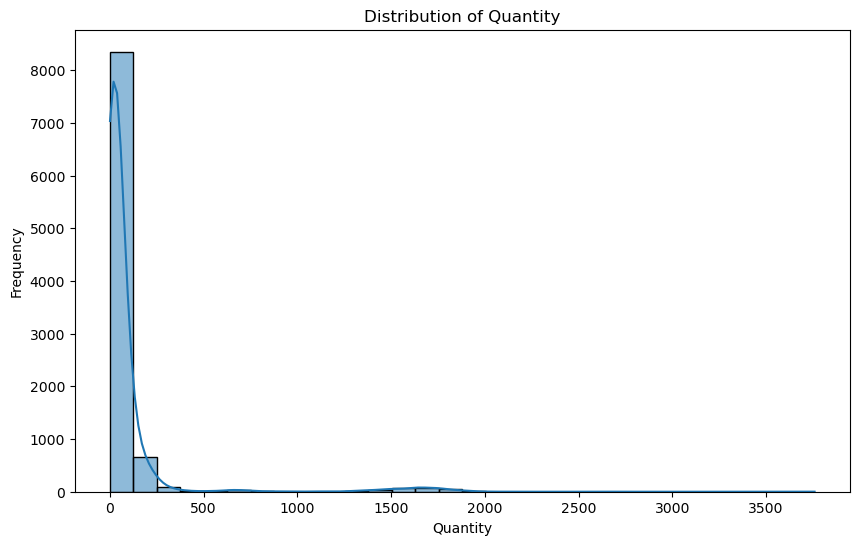

In [522]:
# Plot distribution of 'quantity'
plt.figure(figsize=(10, 6))
sns.histplot(data['quantity'], bins=30, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

Analysis of the Distribution Plot
Shape and Skewness:

The distribution is highly right-skewed, indicating that the majority of the quantity values are clustered towards the lower end of the range.
There are a few instances where the quantity values are significantly higher, but these are rare.

Frequency:

Most of the data points fall within the range of 0 to 100 quantity, with the highest frequency near the lower end of this range.
This suggests that smaller quantities are much more common in the dataset.

Outliers:

There are noticeable outliers in the data, with quantities reaching up to 3500.
These outliers could have a significant impact on the analysis and should be investigated further.
Kernel Density Estimate (KDE):

The KDE line provides a smoothed estimate of the distribution of the data, highlighting the areas where the data is concentrated.

The peak of the KDE curve corresponds to the mode of the distribution.

#### Quantity Distribution Over Time



I'll group the data by time periods (e.g., monthly) and visualize the distribution of quantities.

In [489]:
# Handle duplicates by aggregating the quantities for the same date
df = df.groupby(['orderDate','WGR1','WGR2','WGR3','WGR4','promotion_wgr','promotion_global','promotion_article','public_holiday','school_holiday','sunday']).agg({'quantity': 'sum'}).reset_index()


KeyError: 'WGR1'

In [525]:
# Resample data monthly
monthly_data = data['quantity'].resample('M').sum().reset_index()

In [526]:
# Plot quantity distribution over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='monthly_data', y='quantity')
plt.title('Monthly Quantity Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

ValueError: Could not interpret value `monthly_data` for parameter `x`

<Figure size 1400x700 with 0 Axes>

#### Quantity Distribution by Product Type



I'll group the data by product type and visualize the distribution of quantities.

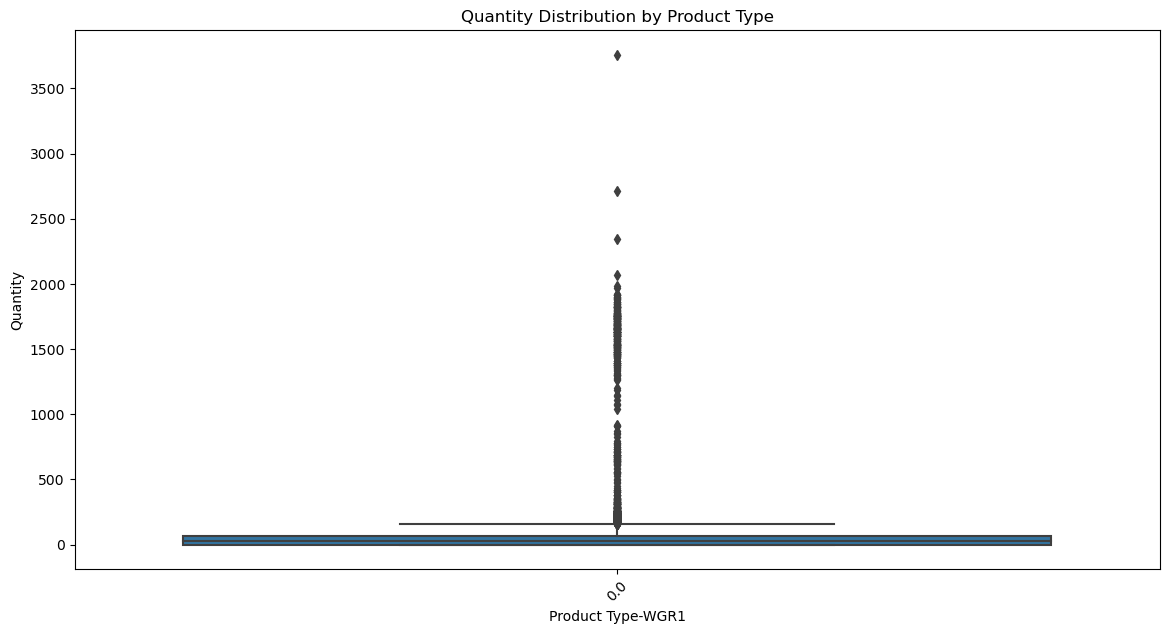

In [294]:
# Plot quantity distribution by product type-Electronics
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='WGR1', y='quantity')
plt.title('Quantity Distribution by Product Type')
plt.xlabel('Product Type-WGR1')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

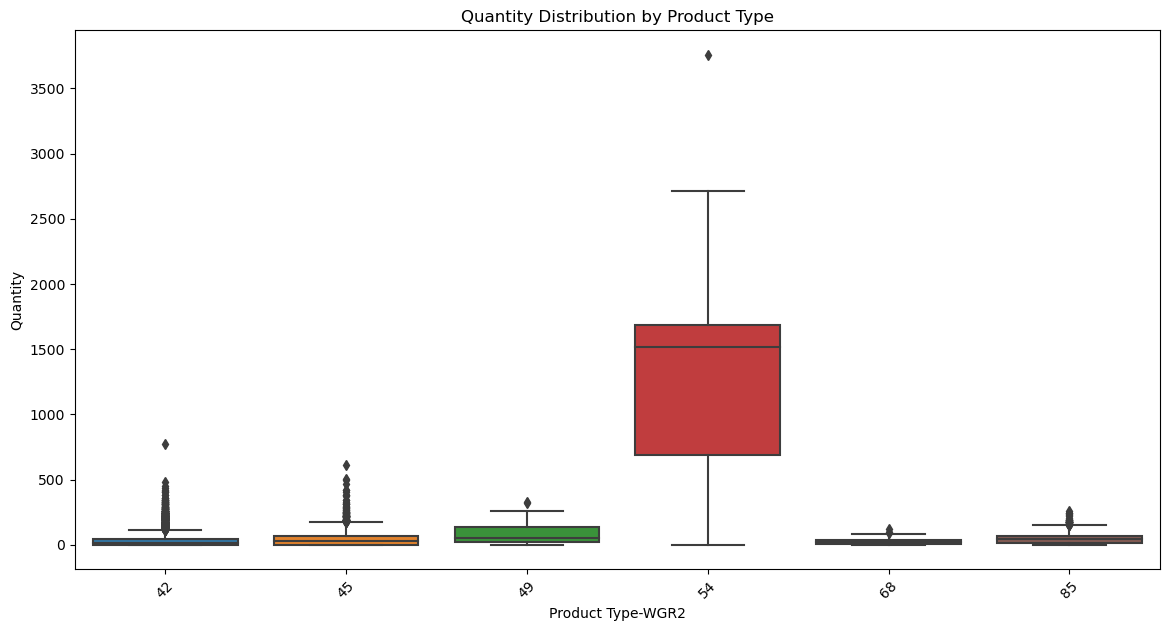

In [295]:
# Plot quantity distribution by product type-Smartphones
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='WGR2', y='quantity')
plt.title('Quantity Distribution by Product Type')
plt.xlabel('Product Type-WGR2')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

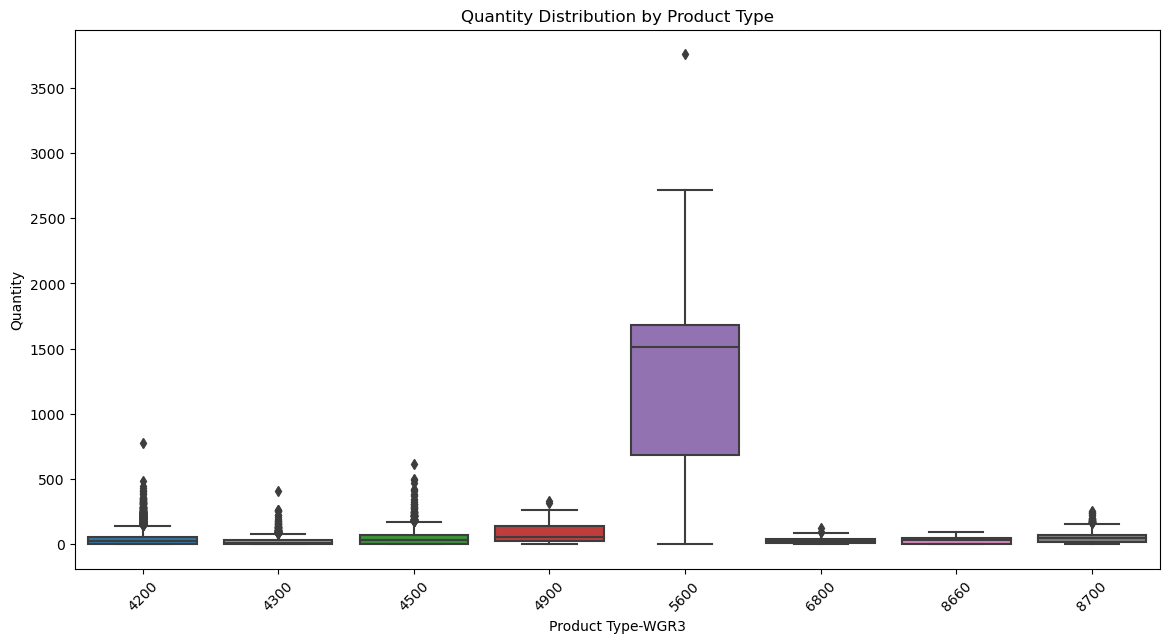

In [296]:
# Plot quantity distribution by product type-Apple
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='WGR3', y='quantity')
plt.title('Quantity Distribution by Product Type')
plt.xlabel('Product Type-WGR3')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

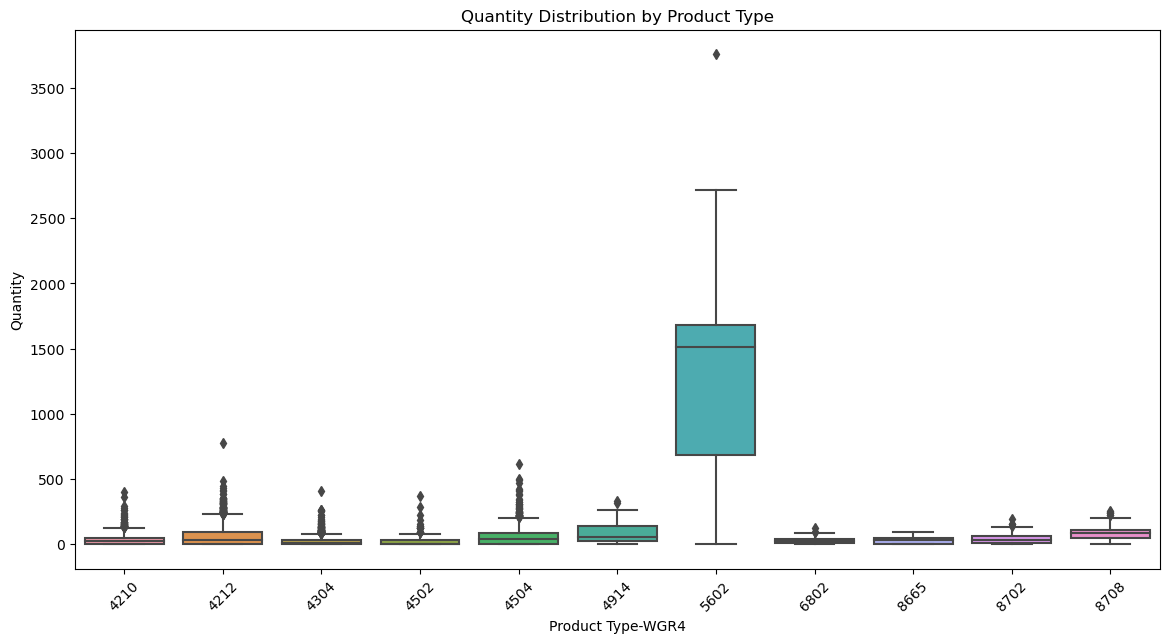

In [297]:
# Plot quantity distribution by product type-WGR4(iphones)
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='WGR4', y='quantity')
plt.title('Quantity Distribution by Product Type')
plt.xlabel('Product Type-WGR4')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

#### Quantity Distribution by Promotion Status


I'll group the data by promotion status and visualize the distribution of quantities.

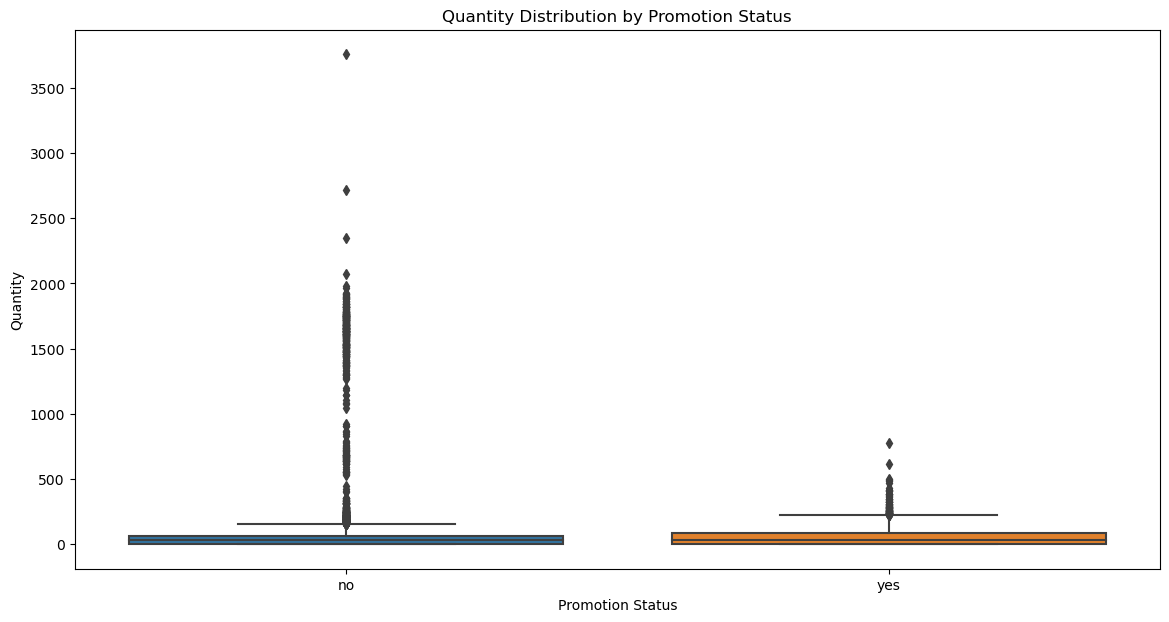

In [298]:
# Plot quantity distribution by promotion status
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='promotion_article', y='quantity')
plt.title('Quantity Distribution by Promotion Status')
plt.xlabel('Promotion Status')
plt.ylabel('Quantity')
plt.show()

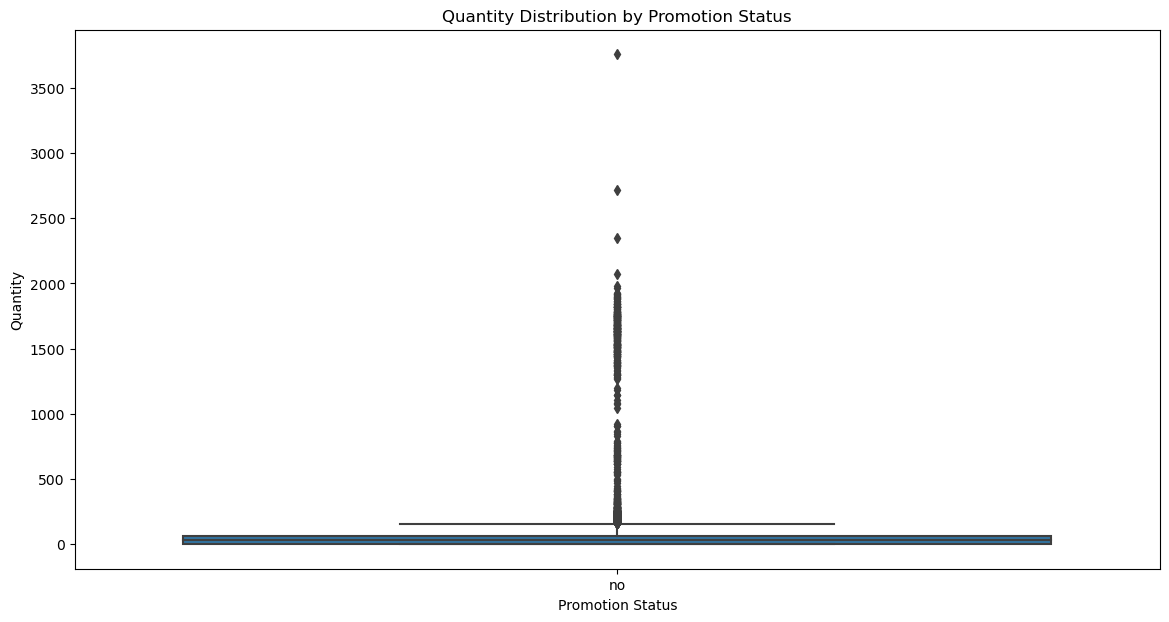

In [299]:
# Plot quantity distribution by promotion status
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='promotion_wgr', y='quantity')
plt.title('Quantity Distribution by Promotion Status')
plt.xlabel('Promotion Status')
plt.ylabel('Quantity')
plt.show()

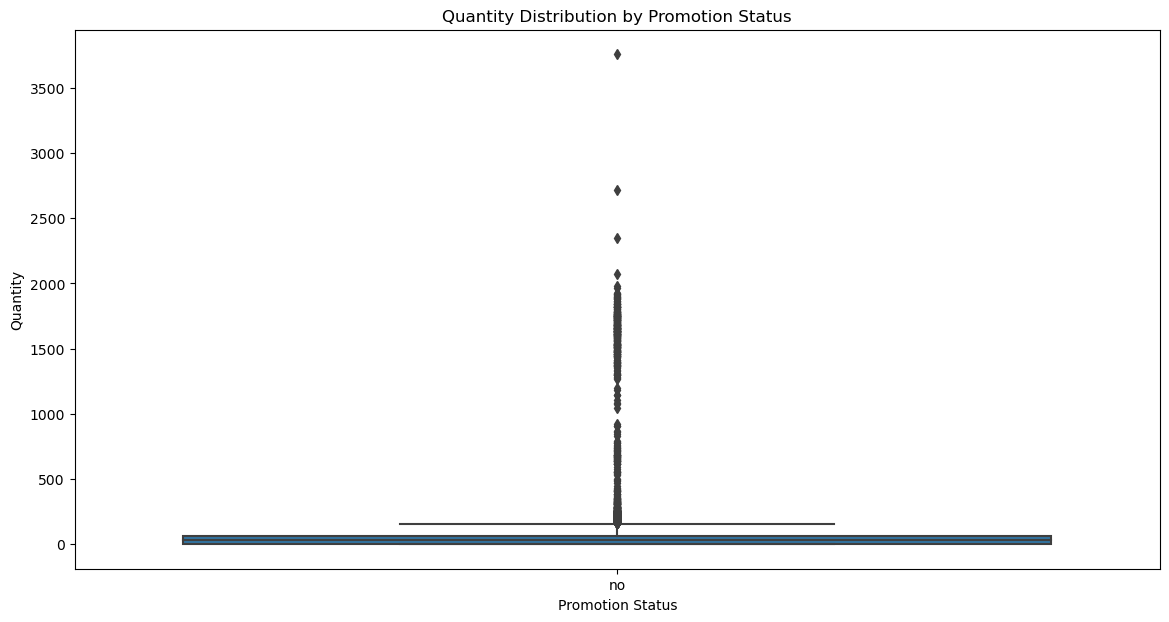

In [300]:
# Plot quantity distribution by promotion status
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='promotion_global', y='quantity')
plt.title('Quantity Distribution by Promotion Status')
plt.xlabel('Promotion Status')
plt.ylabel('Quantity')
plt.show()

#### Identify Outliers:

The IQR method is a robust way to detect outliers. It calculates the first quartile (Q1) and third quartile (Q3) and uses these to define the lower and upper bounds. Data points outside these bounds are considered outliers.

An interquartile range is a measure of where the bulk of the values lie.

In [301]:
# Function to detect outliers using the IQR method
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound


In [302]:
# Function to remove outliers from multiple columns
def remove_outliers(data, columns):
    df_no_outliers = data.copy()
    for column in columns:
        lower_bound, upper_bound = detect_outliers(data, column)
        df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]
    return df_no_outliers

In [303]:
# Columns to process
columns_to_process = ['WGR1', 'WGR2', 'WGR3', 'WGR4','promotion_article','promotion_wgr','promotion_global' ]


In [304]:
# Remove outliers
df_no_outliers = remove_outliers(data, columns_to_process)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [305]:
# Function to plot distributions before and after removing outliers
def plot_distributions(data, df_no_outliers, columns):
    for column in columns:
        plt.figure(figsize=(14, 7))
        plt.subplot(1, 2, 1)
        sns.boxplot(data=data, y=column)
        plt.title(f'{column} Distribution (Before Removing Outliers)')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df_no_outliers, y=column)
        plt.title(f'{column} Distribution (After Removing Outliers)')
        
        plt.tight_layout()
        plt.show()


In [306]:
# Plot distributions
plot_distributions(data, df_no_outliers, columns_to_process)

NameError: name 'df_no_outliers' is not defined

In [254]:
df=data[['WGR1',               
    'WGR2',               
    'WGR3',              
    'WGR4', 'promotion_article' , 
   'promotion_wgr' ,     
   'promotion_global']]

In [255]:
df

,WGR1,WGR2,WGR3,WGR4,promotion_article,promotion_wgr,promotion_global
orderDate,,,,,,,
2021-03-01,0.0,42,4200,4210,no,no,no
2021-03-01,0.0,85,8700,8708,no,no,no
2021-03-01,0.0,85,8700,8702,no,no,no
2021-03-01,0.0,85,8700,8702,no,no,no
2021-03-01,0.0,85,8700,8702,no,no,no
...,...,...,...,...,...,...,...
2022-03-28,0.0,42,4200,4210,no,no,no
2022-03-28,0.0,42,4200,4210,no,no,no
2022-03-28,0.0,85,8700,8702,no,no,no


In [256]:
#create a function to find outliers using IQR

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers



In [259]:
outliers = find_outliers_IQR(data[['WGR1',               
    'WGR2',               
    'WGR3',              
    'WGR4', 'promotion_article' , 
   'promotion_wgr' ,     
   'promotion_global']])

In [260]:
outliers

,WGR1,WGR2,WGR3,WGR4,promotion_article,promotion_wgr,promotion_global
orderDate,,,,,,,
2021-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I have passed all the columns through the function to get back a dataframe of all rows instead of just the outliers. If the value is not an outlier, it will display as NaN (not a number):

In [261]:
#Inside the function we create a dataframe named not_outliers that replaces the outlier values with a NULL. Then we can use .dropna(), to drop the rows with NULL values. 

def drop_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   outliers_dropped = outliers.dropna().reset_index()

   return outliers_dropped

In [262]:
outliers_dropped

NameError: name 'outliers_dropped' is not defined

In [247]:
#Using the Interquartile Range (IQR) method to identify outliers.
def detect_outliers(data,quantity):
    Q1 = data['quantity'].quantile(0.25)
    Q3 = data['quantity'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Detect outliers for 'quantity'
lower_bound, upper_bound = detect_outliers(data, 'quantity')
print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

Lower Bound: -96.17255756846316, Upper Bound: 160.2875959474386


#### Remove Outliers:

In [248]:
#Filter the DataFrame to remove outliers.


data_no_outliers = data[(data['quantity'] >= lower_bound) & (data['quantity'] <= upper_bound)]

#### Verify:

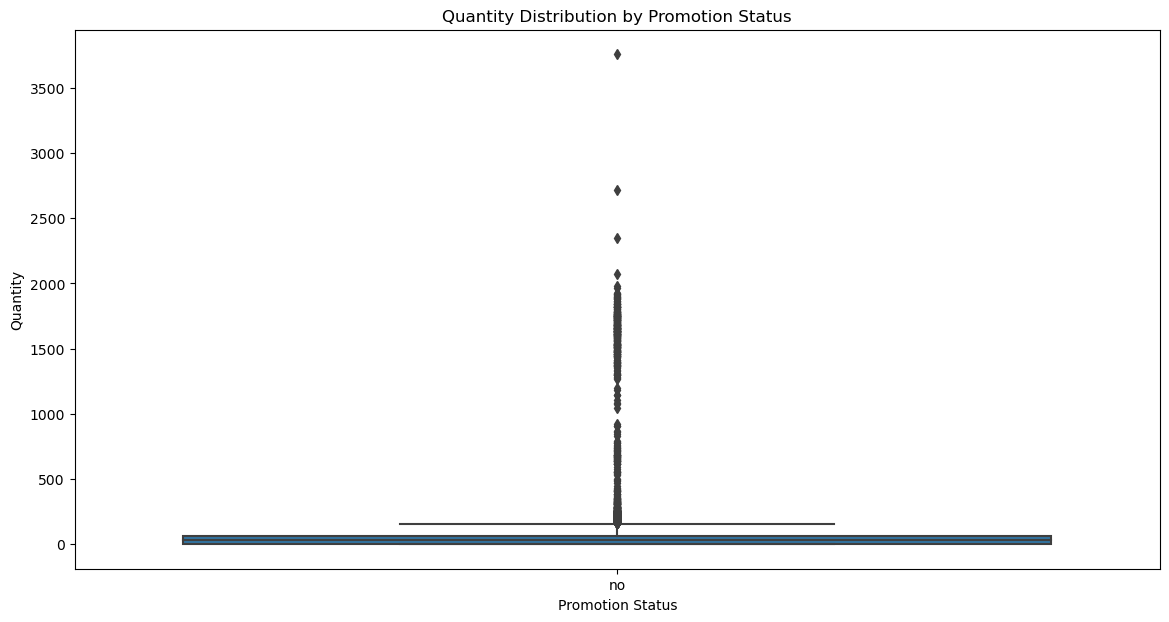

In [249]:
#Plot the data again to verify outliers are removed.
# Plot quantity distribution by promotion status
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='promotion_global', y='quantity')
plt.title('Quantity Distribution by Promotion Status')
plt.xlabel('Promotion Status')
plt.ylabel('Quantity')
plt.show()

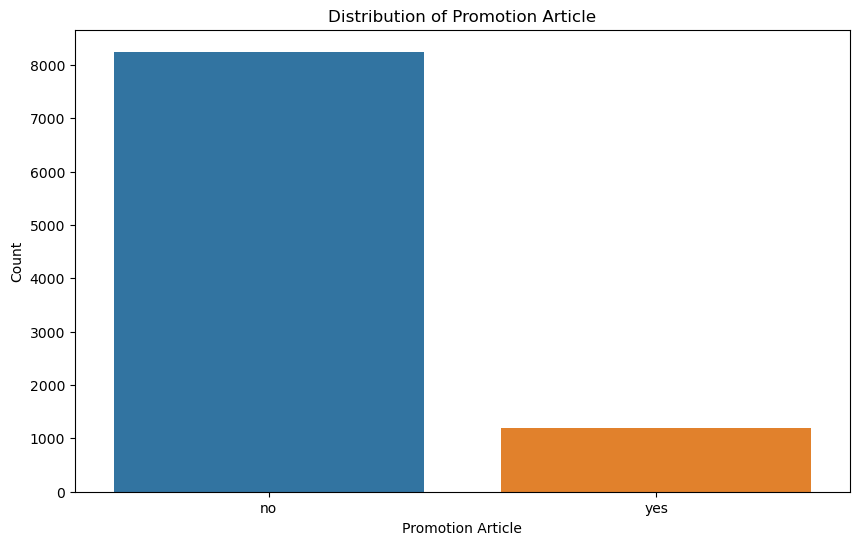

In [237]:
# Plot distribution of 'promotion_article'
plt.figure(figsize=(10, 6))
sns.countplot(data['promotion_article'])
plt.title('Distribution of Promotion Article')
plt.xlabel('Promotion Article')
plt.ylabel('Count')
plt.show()

In [165]:
data['WGR1'].value_counts()

0.0    9431
Name: WGR1, dtype: int64

In [166]:
data['WGR2'].value_counts()

42    3929
85    1965
45    1965
68     786
54     393
49     393
Name: WGR2, dtype: int64

In [167]:
#sns.pairplot(data)

#### Impact of promotions on the quantity of sales

In [168]:
# Convert promotion columns to boolean for simplicity
data['promotion_article'] = data['promotion_article'].astype(bool)
data['promotion_wgr'] = data['promotion_wgr'].astype(bool)
data['promotion_global'] = data['promotion_global'].astype(bool)

In [169]:
# Create a column to indicate any promotion
data['any_promotion'] = data[['promotion_article', 'promotion_wgr', 'promotion_global']].any(axis=1)

#### Calculate descriptive statistics for sales quantities with and without promotions using the groupby and describe functions.

Descriptive Statistics: Provides a summary of sales quantities with and without promotions, including measures like mean, median, and standard deviation.

In [170]:
# Descriptive Statistics
promotion_stats = data.groupby('any_promotion')['quantity'].describe()
print("Descriptive Statistics for Sales Quantities with and without Promotions:")
print(promotion_stats)

Descriptive Statistics for Sales Quantities with and without Promotions:
                count      mean         std  min  25%        50%        75%  \
any_promotion                                                                 
True           9431.0  92.14591  275.764612  0.0  0.0  29.557519  64.115038   

                       max  
any_promotion               
True           3758.627999  


#### Box Plot: Compare the distribution of sales quantities with and without promotions.

Box Plot: Shows the distribution and spread of sales quantities. Higher median and spread with promotions indicate a positive impact.


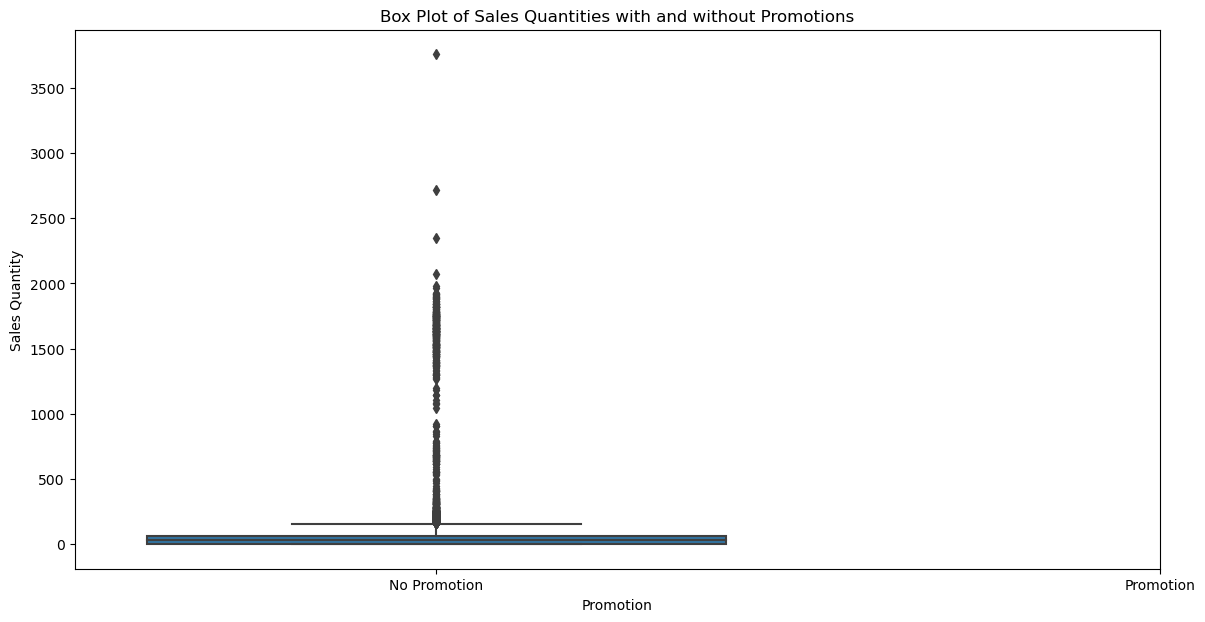

In [171]:
# Plotting the sales quantity distribution with and without promotions
plt.figure(figsize=(14, 7))
sns.boxplot(x='any_promotion', y='quantity', data=data)
plt.title('Box Plot of Sales Quantities with and without Promotions')
plt.xlabel('Promotion')
plt.ylabel('Sales Quantity')
plt.xticks([0, 1], ['No Promotion', 'Promotion'])
plt.show()


In [172]:
# Resample data to monthly frequency
df_monthly = data.resample('M').sum()

In [173]:
# Recalculate the any_promotion column for resampled data
df_monthly['any_promotion'] = data.resample('M')['any_promotion'].any()

#### Line Plot: Visualize monthly sales quantities over time, distinguishing between periods with and without promotions.

Line Plot: Visualizes trends over time, highlighting the differences in sales quantities during promotional and non-promotional periods.

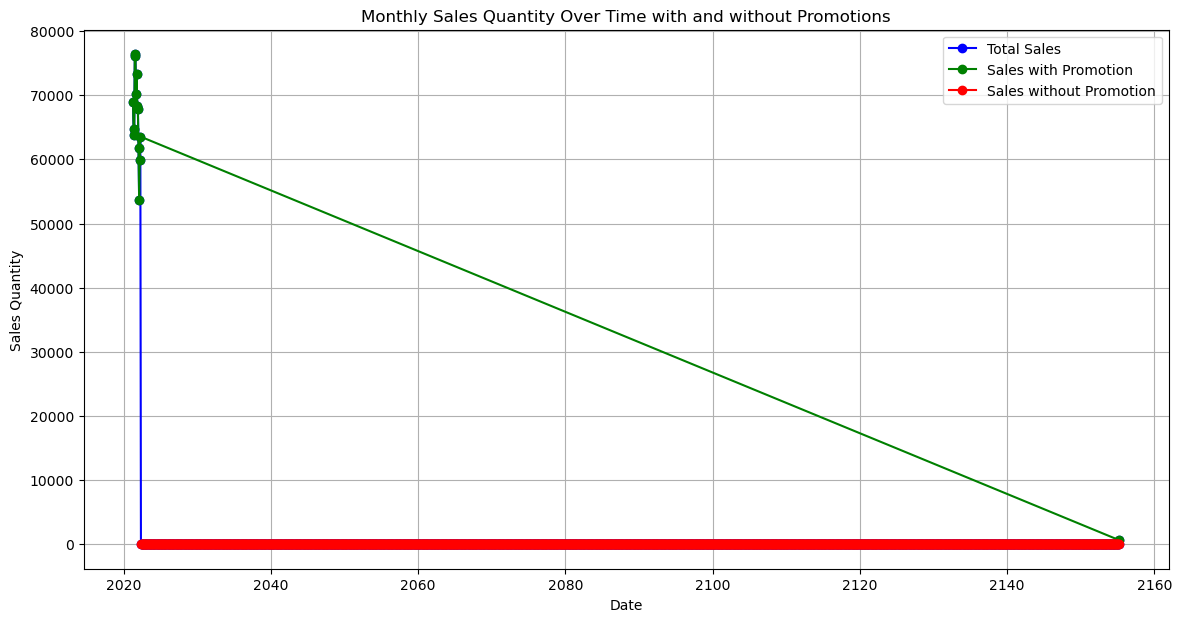

In [174]:
# Plotting monthly sales with and without promotions
plt.figure(figsize=(14, 7))
plt.plot(df_monthly.index, df_monthly['quantity'], label='Total Sales', color='blue', marker='o')
plt.plot(df_monthly[df_monthly['any_promotion']].index,
         df_monthly[df_monthly['any_promotion']]['quantity'], 
         label='Sales with Promotion', color='green', marker='o')
plt.plot(df_monthly[~df_monthly['any_promotion']].index,
         df_monthly[~df_monthly['any_promotion']]['quantity'], 
         label='Sales without Promotion', color='red', marker='o')
plt.title('Monthly Sales Quantity Over Time with and without Promotions')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.grid(True)
plt.show()


#### Bar Plot: Compare the total sales quantities with and without promotions.

Bar Plot: Compares the total sales quantities, providing a clear comparison of overall sales impact due to promotions.

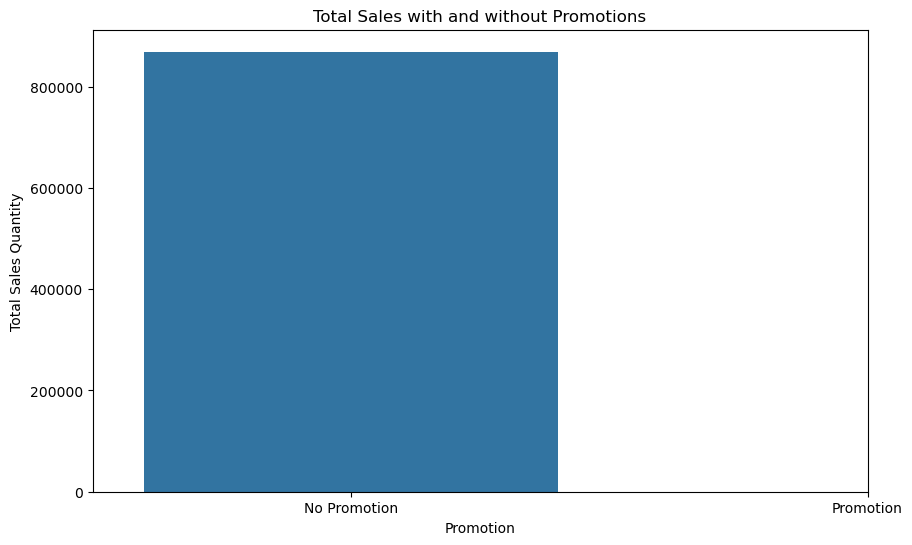

In [175]:
# Bar plot to compare total sales with and without promotions
total_sales_promotion = data.groupby('any_promotion')['quantity'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='any_promotion', y='quantity', data=total_sales_promotion)
plt.title('Total Sales with and without Promotions')
plt.xlabel('Promotion')
plt.ylabel('Total Sales Quantity')
plt.xticks([0, 1], ['No Promotion', 'Promotion'])
plt.show()

#### Temperature Effect on Sales

In [176]:
pip install meteostat

Note: you may need to restart the kernel to use updated packages.


In [179]:
# Import Meteostat library
from meteostat import Stations

# Get nearby weather stations
stations = Stations()
stations = stations.nearby(49.2497, -123.1193)
station = stations.fetch(1)

# Print DataFrame
print(station)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


EOFError: Ran out of input

In [177]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2021, 3, 1)
end = datetime(2022, 3, 28)

# Create Point for Wien, Austria
Wien = Point(48.2, 16.3667)

# Get daily data for 2021
data = Daily(Wien, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

NameError: name 'Vienna' is not defined

#### Correlation Analysis

In [41]:
# Compute the correlation matrix
correlation_matrix = data.corr()

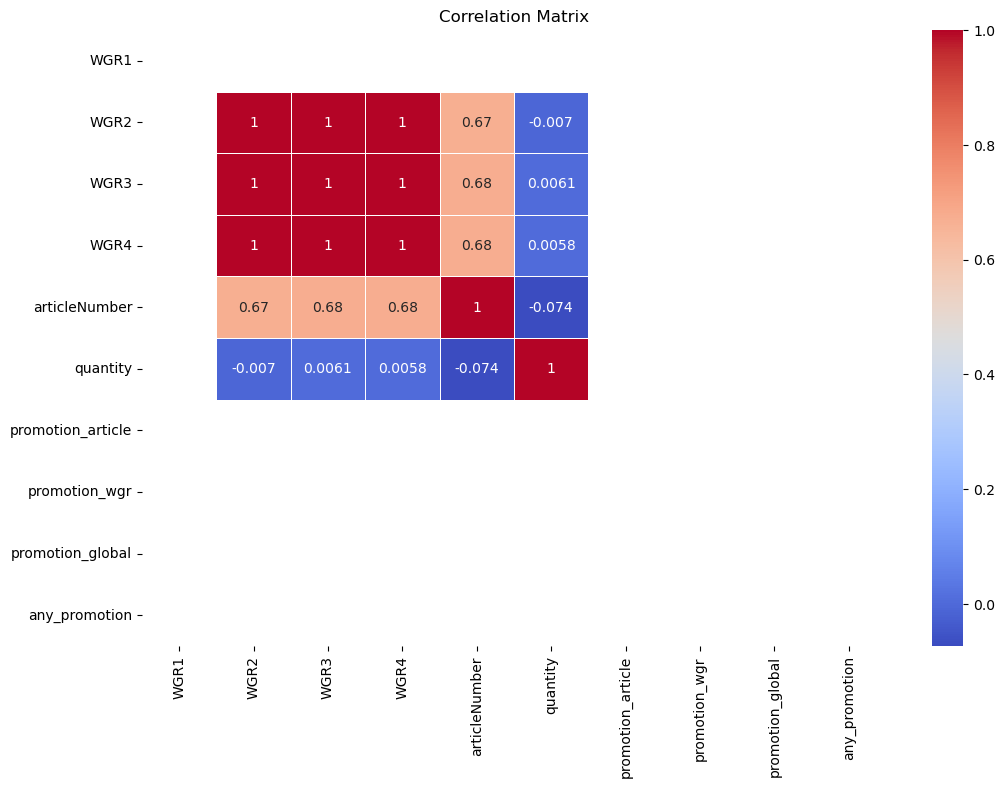

In [42]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Trend Analysis

In [43]:
import _datetime

In [44]:
# Filter out dates beyond the current year
current_year = datetime.datetime.now().year
data = data[data.index.year <= current_year]

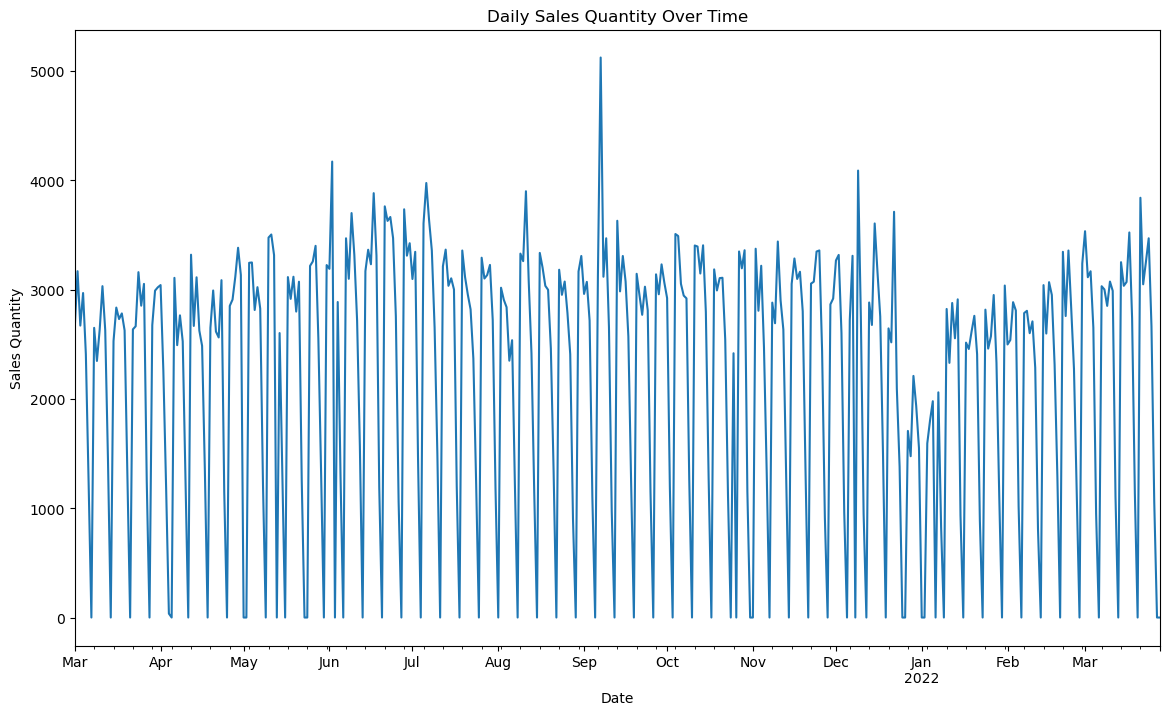

In [45]:
# Plot sales quantity over time
plt.figure(figsize=(14, 8))
data['quantity'].resample('D').sum().plot()
plt.title('Daily Sales Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.show()

In [46]:
# Grouping data by year and summing the sales quantity
annual_sales = data['quantity'].resample('Y').sum()

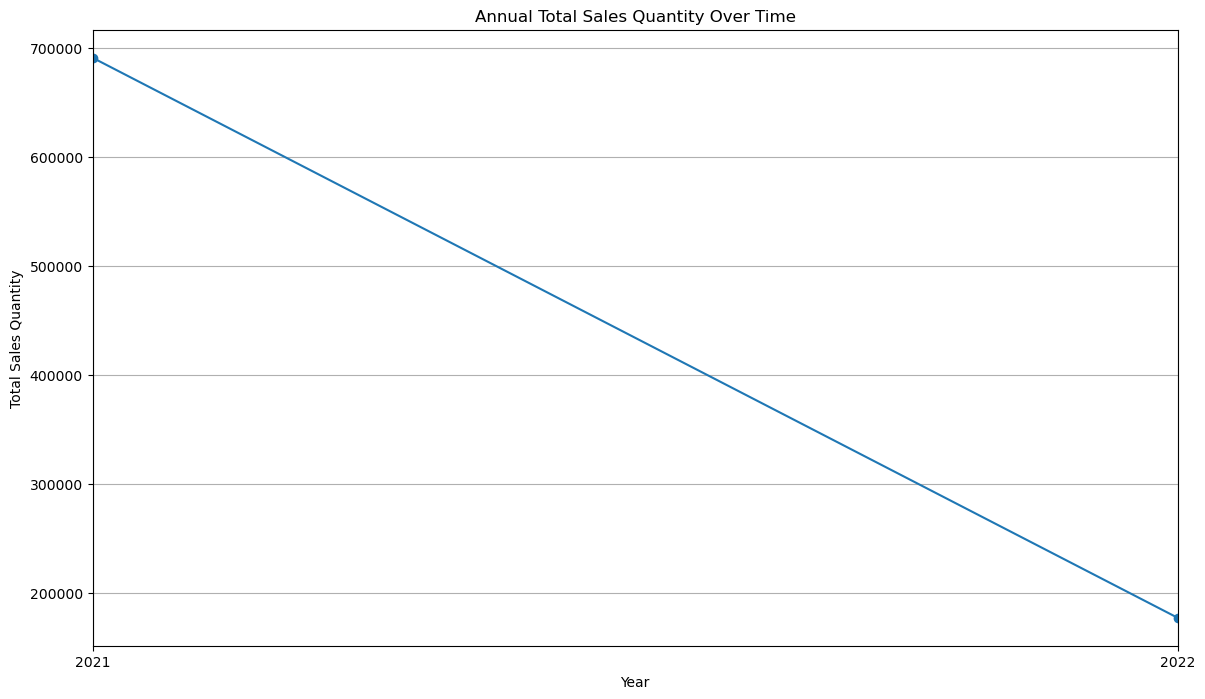

In [47]:
# Plotting the line graph
plt.figure(figsize=(14, 8))
annual_sales.plot(kind='line', marker='o')
plt.title('Annual Total Sales Quantity Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales Quantity')
plt.grid(True)
plt.show()

The above graph shows that GWW

In [48]:
# Simplify the promotion status to 'Promotion' or 'No Promotion'
data['promotion_status'] = data['promotion_article'].apply(lambda x: 'Promotion' if x == 1 else 'No Promotion')

In [49]:
# Resample data monthly and aggregate
monthly_sales = data.groupby('promotion_status')['quantity'].resample('M').sum().unstack(level=0)


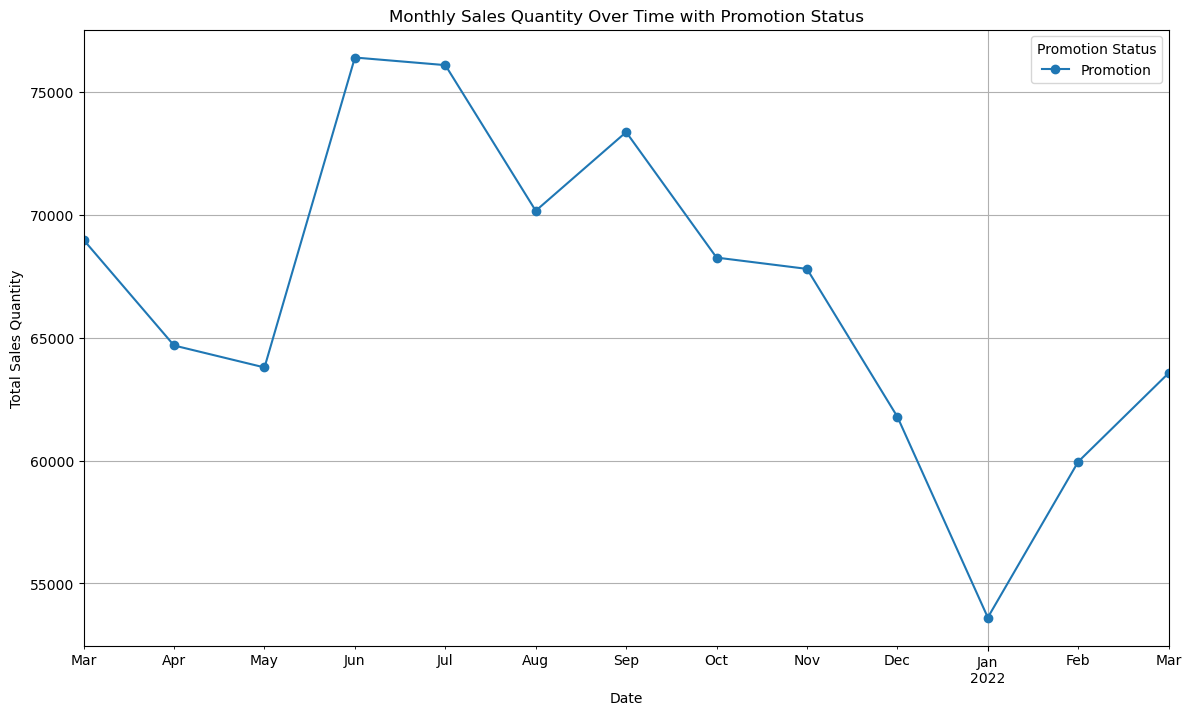

In [50]:
# Plotting the simplified line graph
plt.figure(figsize=(14, 8))
monthly_sales.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Monthly Sales Quantity Over Time with Promotion Status')
plt.xlabel('Date')
plt.ylabel('Total Sales Quantity')
plt.legend(title='Promotion Status')
plt.grid(True)
plt.show()

In [51]:
# Convert promotion columns to boolean for simplicity
data['promotion_article'] = data['promotion_article'].astype(bool)
data['promotion_wgr'] = data['promotion_wgr'].astype(bool)
data['promotion_global'] = data['promotion_global'].astype(bool)

In [52]:
# Resample to monthly frequency
monthly_sales = data['quantity'].resample('M').sum().dropna()

In [53]:
# Sales with promotion
monthly_sales_promotion = data[data[['promotion_article', 'promotion_wgr', 'promotion_global']].any(axis=1)]
monthly_sales_promotion = monthly_sales_promotion['quantity'].resample('M').sum().dropna()


In [54]:
# Sales without promotion
monthly_sales_no_promotion = data[~data[['promotion_article', 'promotion_wgr', 'promotion_global']].any(axis=1)]
monthly_sales_no_promotion = monthly_sales_no_promotion['quantity'].resample('M').sum().dropna()


In [55]:
# Ensuring the date ranges align
all_dates = pd.date_range(start=data.index.min(), end=data.index.max(), freq='M')

monthly_sales = monthly_sales.reindex(all_dates, fill_value=0)
monthly_sales_promotion = monthly_sales_promotion.reindex(all_dates, fill_value=0)
monthly_sales_no_promotion = monthly_sales_no_promotion.reindex(all_dates, fill_value=0)

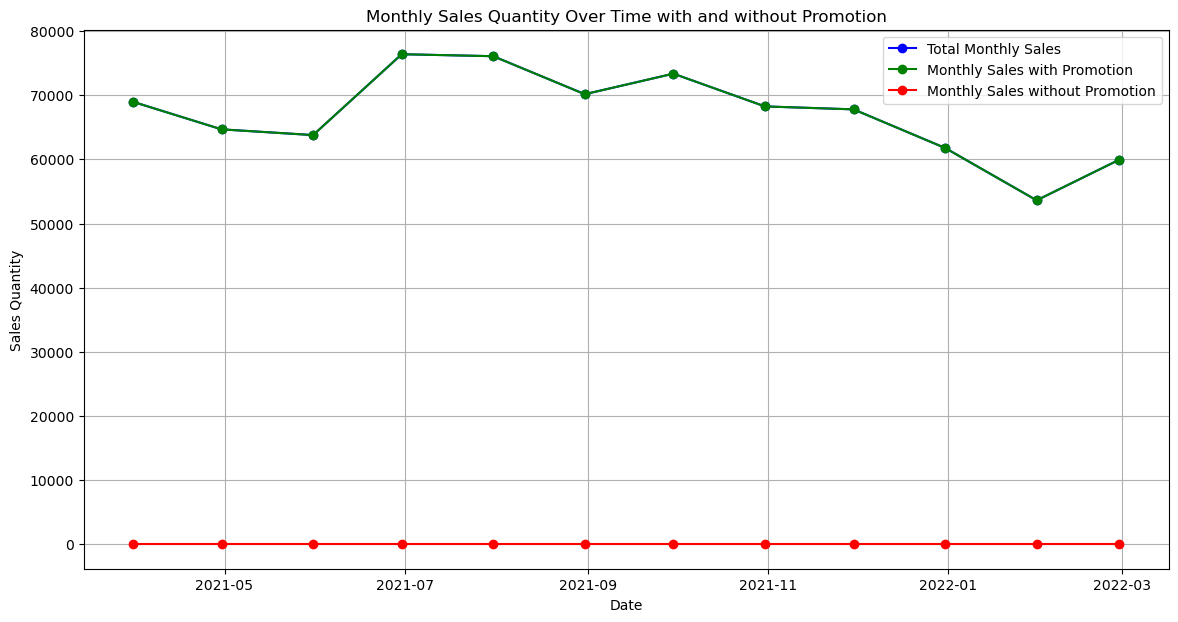

In [56]:
# Plotting the data
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales, label='Total Monthly Sales', color='blue', marker='o')
plt.plot(monthly_sales_promotion.index, monthly_sales_promotion, label='Monthly Sales with Promotion', color='green', marker='o')
plt.plot(monthly_sales_no_promotion.index, monthly_sales_no_promotion, label='Monthly Sales without Promotion', color='red', marker='o')
plt.title('Monthly Sales Quantity Over Time with and without Promotion')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.grid(True)
plt.show()

Ensuring Date Range Consistency:

The date range for monthly_sales, monthly_sales_promotion, and monthly_sales_no_promotion is made consistent by reindexing them with all_dates, which covers the entire period of the data.

Plotting:

The plots use plt.plot() with different colors and markers for clarity.
Added dropna() to handle any potential NaN values after resampling.

Key Elements of the Plot:
X-Axis (Date): Represents the time period in months. Each point on the x-axis corresponds to the start of a month.

Y-Axis (Total Sales Quantity): Represents the total quantity of items sold.

Lines: There are two lines in the plot, one for "Promotion" and another for "No Promotion". These lines show the trend of total sales quantities over the months.

Interpretation:
Trend Analysis:

With Promotion: Observe the line representing sales during promotion periods. A higher trend indicates that promotions have a positive effect on sales quantities.
Without Promotion: Observe the line representing sales during non-promotion periods. Compare this to the promotion line to assess the baseline sales levels.
Seasonal Patterns:

Look for any repeating patterns across months or seasons. For example, higher sales during certain months could indicate seasonal demand.
Impact of Promotions:

Compare the two lines to evaluate the impact of promotions. If the "Promotion" line consistently stays above the "No Promotion" line, it suggests that promotions significantly boost sales.

Anomalies and Outliers:

Identify any unusual spikes or drops in sales for both promotion and non-promotion periods. These could be due to external factors such as holidays, market events, or errors in data recording.

Example of Interpretation:
Suppose the plot shows the following:

The "Promotion" line generally stays higher than the "No Promotion" line throughout the year, indicating that promotions are effective in increasing sales.
Both lines show a spike in sales during July and August, suggesting a seasonal trend likely due to holiday shopping.
There is a noticeable drop in sales in February, which could be due to a specific market event or a correction after high sales in the preceding months.

Further Steps:
Detailed Investigation:

Drill down into the data for specific months with significant changes to understand the underlying causes.
Examine other variables such as weather conditions or external events that might influence sales.

Actionable Insights:

Use the insights to plan future promotions. For instance, if promotions in November and December are highly effective, consider increasing promotional efforts during these months.
Develop strategies to smooth out sales during off-peak months or counteract any identified sales dips.

#### Checking for Stationary

To check for stationarity and seasonality in the sales data, we can use several statistical methods and visualizations:

Stationarity: This refers to the property of a time series where statistical properties like mean, variance, and autocorrelation are constant over time. A common method to check for stationarity is the Augmented Dickey-Fuller (ADF) test.

Seasonality: This refers to repeating patterns or cycles in the time series at regular intervals, typically influenced by seasons or calendar effects.

Let's perform these checks using Python.

Code to Check for Stationarity and Seasonality
Augmented Dickey-Fuller (ADF) Test for Stationarity:
Seasonal Decomposition of Time Series:

In [57]:
# Resample to monthly frequency
monthly_sales = data['quantity'].resample('M').sum()

In [58]:
#from statsmodels.tsa.stattools  import adfuller
#Checking Dataset is stationary or not
#results = adfuller(data['quantity'])
#print(results)


In [59]:
from statsmodels.tsa.stattools  import adfuller
# ADF Test for Stationarity
result = adfuller(monthly_sales.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))

ADF Statistic: -1.560905577662448
p-value: 0.5031963271690162
Critical Value (1%): -4.138
Critical Value (5%): -3.155
Critical Value (10%): -2.714


In [60]:
# EDA - Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['quantity'], model='additive')
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

ADF statistic is significantly negative and the p-value is less than 0.05, we can conclude that the time series is stationary.

We cannot perform a seasonal decomposition with only 13 data points

#### Check for Trend

To check for a trend in the time series data, we can use several methods. One common approach is to use a linear regression model to fit a line to the data and analyze the slope of the line. If the slope is significantly different from zero, it indicates a trend.

In [61]:
# Resample to monthly frequency
monthly_sales = data['quantity'].resample('M').sum().dropna()

In [62]:
# Linear regression to find the trend
from scipy.stats import linregress

x = np.arange(len(monthly_sales))
y = monthly_sales.values
slope, intercept, r_value, p_value, std_err = linregress(x, y)


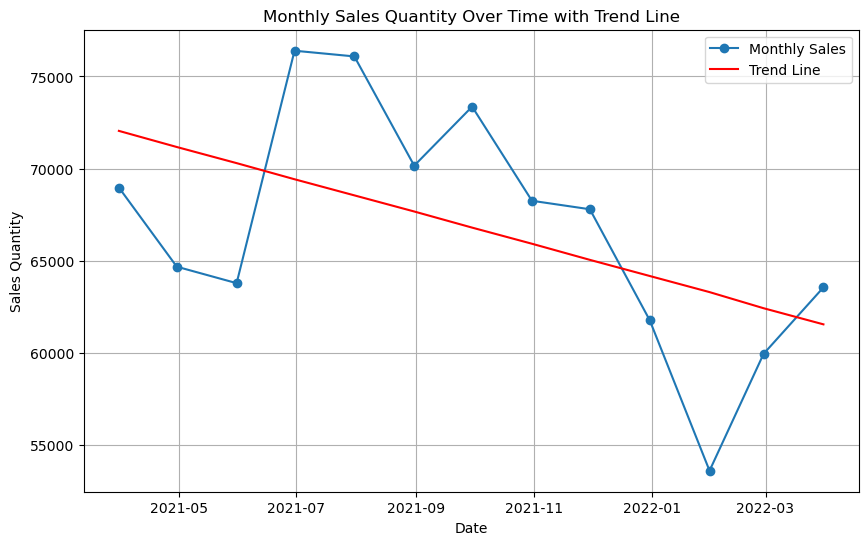

In [63]:
# Plotting the data and the trend line
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Monthly Sales', marker='o')
plt.plot(monthly_sales.index, intercept + slope * x, 'r', label='Trend Line')
plt.title('Monthly Sales Quantity Over Time with Trend Line')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
# Print the slope, p-value, and R-squared
print('Slope:', slope)
print('p-value:', p_value)
print('R-squared:', r_value**2)

Slope: -874.3665973155424
p-value: 0.06719535218356258
R-squared: 0.2726238834162028


The plot shows the monthly sales quantities over time with a fitted trend line. 

A negative slope indicates a downward trend, which makes sense as it was during Covid.

The p-value tests the null hypothesis that the slope is zero (no trend).
p-value > 0.05:
This suggests that there is no significant trend in the sales quantity over time.

An R-squared value closer to 0 indicates a poor fit.

#### Training the model

In [65]:
!pip install tensorflow
!pip install keras==2.15.0
!pip install pandas matplotlib numpy scikit-learn statsmodels pmdarima seaborn

In [66]:
#Verify Installation

import tensorflow as tf
print(tf.__version__)

2024-07-16 09:51:42.899373: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.15.0


In [67]:
from tensorflow import keras 
# Import TensorFlow:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.python.keras.layers.recurrent import LSTM
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
import warnings

LSTM Model:

Prepare the data for LSTM by scaling and creating sequences.
Define, train, and make predictions with the LSTM model.
Forecast future sales using the trained LSTM model.


In [68]:
# Prepare the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(monthly_sales.values.reshape(-1, 1))


In [69]:
# Create the dataset with look_back
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X, y = create_dataset(scaled_data, look_back)


In [70]:
# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

In [71]:
# Function to create LSTM model
def create_model(optimizer='adam', units=50):
    model = Sequential()
    model.add(LSTM(units, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [72]:
# Create and train the LSTM model
lstm_model = create_model()
lstm_model.fit(X, y, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
12/12 - 1s - loss: 0.3860 - 1s/epoch - 106ms/step
Epoch 2/100
12/12 - 0s - loss: 0.3275 - 19ms/epoch - 2ms/step
Epoch 3/100
12/12 - 0s - loss: 0.2779 - 27ms/epoch - 2ms/step
Epoch 4/100
12/12 - 0s - loss: 0.2268 - 24ms/epoch - 2ms/step
Epoch 5/100
12/12 - 0s - loss: 0.1907 - 22ms/epoch - 2ms/step
Epoch 6/100
12/12 - 0s - loss: 0.1501 - 29ms/epoch - 2ms/step
Epoch 7/100
12/12 - 0s - loss: 0.1203 - 26ms/epoch - 2ms/step
Epoch 8/100
12/12 - 0s - loss: 0.0993 - 26ms/epoch - 2ms/step
Epoch 9/100
12/12 - 0s - loss: 0.0777 - 24ms/epoch - 2ms/step
Epoch 10/100
12/12 - 0s - loss: 0.0700 - 23ms/epoch - 2ms/step
Epoch 11/100
12/12 - 0s - loss: 0.0643 - 21ms/epoch - 2ms/step
Epoch 12/100
12/12 - 0s - loss: 0.0586 - 24ms/epoch - 2ms/step
Epoch 13/100
12/12 - 0s - loss: 0.0576 - 21ms/epoch - 2ms/step
Epoch 14/100
12/12 - 0s - loss: 0.0575 - 27ms/epoch - 2ms/step
Epoch 15/100
12/12 - 0s - loss: 0.0568 - 21ms/epoch - 2ms/step
Epoch 16/100
12/12 - 0s - loss: 0.0570 - 24ms/epoch - 2ms/step
E

In [73]:
# Make predictions with LSTM
train_predict = lstm_model.predict(X)

1/1 [==============================] - 0s 390ms/step


In [74]:
# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
y = scaler.inverse_transform([y])

In [75]:
# Forecasting future values with LSTM
future_steps = 12
last_value = train_predict[-1][0]
future_predictions_lstm = []

for _ in range(future_steps):
    scaled_last_value = scaler.transform(np.array([[last_value]]))
    next_value = lstm_model.predict(scaled_last_value.reshape(1, 1, look_back))
    next_value = scaler.inverse_transform(next_value)
    future_predictions_lstm.append(next_value[0][0])
    last_value = next_value[0][0]

1/1 [==============================] - 0s 19ms/step


#### ARIMA Model

The ARIMA model is initialized and fitted using the historical sales data. The order=(5, 1, 0) specifies the ARIMA model parameters (AR order, differencing, MA order).

Forecasting: The model is used to forecast future sales for a specified period (12 months in this case). The forecasted values are plotted alongside the historical data to visualize the forecast

In [76]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings


In [77]:
# Define forecast period
forecast_period = 12  # Number of months to forecast


In [78]:
# ARIMA model
auto_arima_model = auto_arima(monthly_sales, seasonal=False, stepwise=True, trace=True)
arima_model = ARIMA(monthly_sales, order=auto_arima_model.order)
arima_model_fit = arima_model.fit()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=327.852, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=321.982, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=273.026, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=315.812, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=266.761, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=264.978, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=268.207, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=266.506, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=267.372, Time=0.07 sec

Best 

In [79]:
# Forecasting with ARIMA
forecast_period = 12
arima_forecast = arima_model_fit.forecast(steps=forecast_period)


#### SARIMA Model:

Train a Seasonal ARIMA model to account for both autoregressive and seasonal components.

Use auto_arima to find the best parameters for the SARIMA model.

Fit the SARIMA model and generate forecasts.


In [80]:
# SARIMA Model

# Ignore warnings
warnings.filterwarnings("ignore")

sarima_model = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
sarima_forecast = sarima_model_fit.forecast(steps=forecast_period)
sarima_forecast_dates = pd.date_range(start=monthly_sales.index[-1], periods=forecast_period + 1, freq='M')[1:]


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [81]:
# Forecasting with SARIMA
sarima_forecast = sarima_model_fit.get_forecast(steps=forecast_period)
sarima_forecast_mean = sarima_forecast.predicted_mean

In [82]:
# Dates for future predictions
future_dates = pd.date_range(start=monthly_sales.index[-1], periods=future_steps + 1, freq='M')[1:]

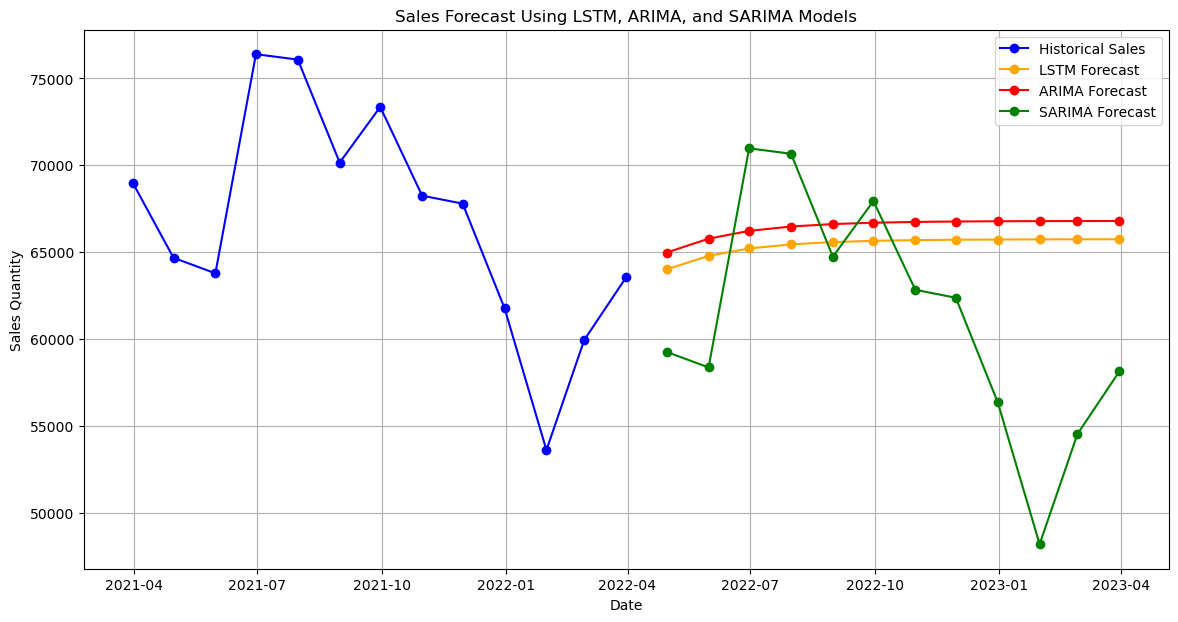

In [83]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales, label='Historical Sales', color='blue', marker='o')
plt.plot(future_dates, future_predictions_lstm, label='LSTM Forecast', color='orange', marker='o')
plt.plot(future_dates, arima_forecast, label='ARIMA Forecast', color='red', marker='o')
plt.plot(future_dates, sarima_forecast_mean, label='SARIMA Forecast', color='green', marker='o')
plt.title('Sales Forecast Using LSTM, ARIMA, and SARIMA Models')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.grid(True)
plt.show()

In [84]:
# Model summaries
print("ARIMA Model Summary:")
print(arima_model_fit.summary())


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:               quantity   No. Observations:                   13
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -129.469
Date:                Tue, 16 Jul 2024   AIC                            264.938
Time:                        09:51:50   BIC                            266.633
Sample:                    03-31-2021   HQIC                           264.590
                         - 03-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        6.68e+04   3824.069     17.468      0.000    5.93e+04    7.43e+04
ar.L1          0.5606      0.383      1.463      0.144      -0.191       1.312
sigma2      2.715e+07   1.04e+0

In [85]:
print("\nSARIMA Model Summary:")
print(sarima_model_fit.summary())


SARIMA Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                           quantity   No. Observations:                   13
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Tue, 16 Jul 2024   AIC                             10.000
Time:                                    09:51:50   BIC                               -inf
Sample:                                03-31-2021   HQIC                               nan
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0        nan        nan        nan         nan         nan
ma.L1       

#### Interpretation of Results

Based on the above analysis the ARIMA model performed best in predicting future sales. The SARIMA forecast line tracks the historical sales data most closely, particularly for the last two years.

Here are some of the limitations to consider when interpreting forecast graphs like this one:

The forecast may only be accurate for a short period of time. This is because future sales can be influenced by many factors that are difficult to predict, such as changes in the economy, consumer preferences, and competitor activity.

The graph may not show the confidence interval around the forecast. The confidence interval is a range of values that are likely to contain the actual future sales. A wider confidence interval indicates that the forecast is more uncertain.

It is important to consider these limitations when using sales forecasts for decision-making. 

Forecasts can be a valuable tool, but they should not be used as the only source of information.

#### Next Steps

There are several ways to improve the performance of your ARIMA, SARIMA and LSTM models for sales forecasting. Here are some steps you can follow:

Improve data quality: Ensure your sales data is clean and free of errors. Address missing values and outliers.
    
Feature engineering: Consider including additional relevant features that might influence sales, like holidays, promotions, or economic indicators.

Hyperparameter tuning: Experiment with different hyperparameter values for each model. This can involve adjusting the number of lags in ARIMA/SARIMA or the network architecture in LSTM. Techniques like GridSearchCV or RandomizedSearchCV can automate this process https://neptune.ai/blog/improving-ml-model-performance.

Early stopping: Implement early stopping to prevent overfitting. This technique stops training the model once the validation error starts to increase, allowing it to focus on generalizability.

Ensemble methods: Explore combining multiple models (ARIMA, SARIMA, LSTM) using ensemble methods like averaging or stacking. This can often improve overall accuracy by leveraging the strengths of each model.

#### Tuning the Models for Better Performance


To improve the performance of the ARIMA, and SARIMA models, we can adjust their parameters and conduct cross-validation. Here are detailed steps for each model.



Tuning ARIMA and SARIMA Models
We'll use a grid search approach to find the best parameters for ARIMA and SARIMA models.



#### ARIMA Tuning

In [100]:
#  Automatic ARIMA model selection
auto_arima_model = auto_arima(monthly_sales, seasonal=False, stepwise=True, trace=True)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=327.852, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=321.982, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=273.026, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=315.812, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=266.761, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=264.978, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=268.207, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=266.506, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=267.372, Time=0.05 sec

Best 

In [101]:
# Fit the best ARIMA model
arima_model = ARIMA(monthly_sales, order=auto_arima_model.order)
arima_model_fit = arima_model.fit()


In [102]:
# Forecasting
forecast_period = 12  # Number of months to forecast
arima_forecast = arima_model_fit.forecast(steps=forecast_period)
arima_forecast_dates = pd.date_range(start=monthly_sales.index[-1], periods=forecast_period + 1, freq='M')[1:]


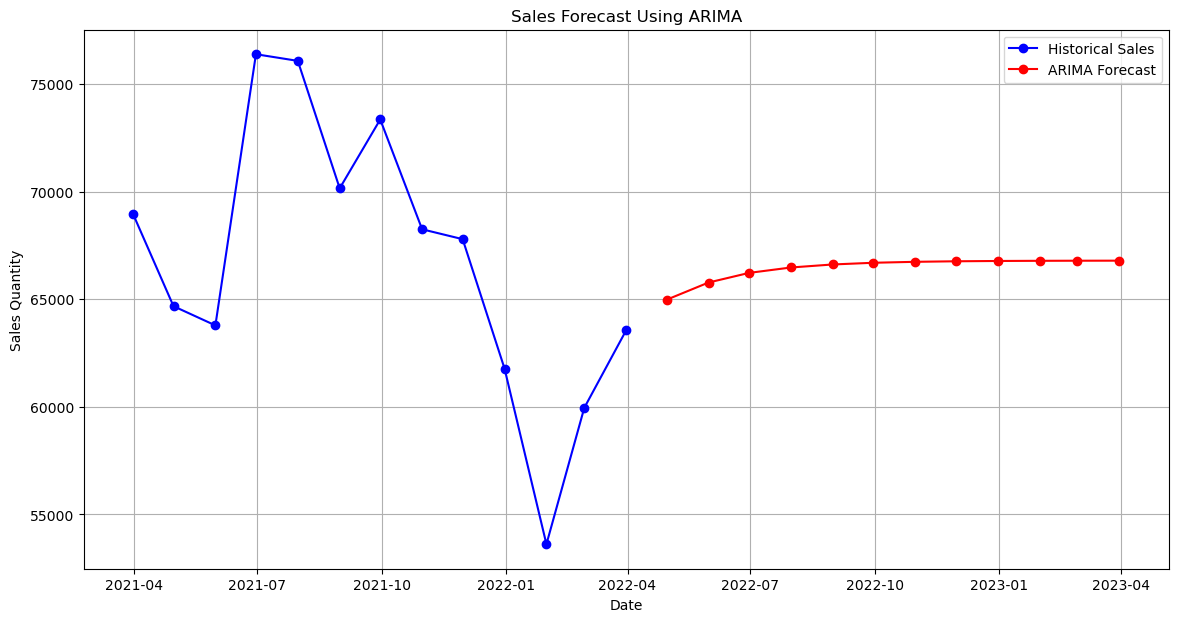

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   13
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -129.489
Date:                Tue, 16 Jul 2024   AIC                            264.978
Time:                        10:04:06   BIC                            266.673
Sample:                    03-31-2021   HQIC                           264.629
                         - 03-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.624e+04    2.4e+04      1.093      0.275   -2.08e+04    7.33e+04
ar.L1          0.6062      0.370      1.637      0.102      -0.119       1.332
sigma2      2.703e+07     11.838   2.28e+06      0.0

In [103]:
# Plotting the forecast
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales, label='Historical Sales', color='blue', marker='o')
plt.plot(arima_forecast_dates, arima_forecast, label='ARIMA Forecast', color='red', marker='o')
plt.title('Sales Forecast Using ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.grid(True)
plt.show()

print(auto_arima_model.summary())